In [1]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn import cluster
from scipy.spatial import distance
from sklearn.decomposition import PCA
import sys
import warnings

if not sys.warnoptions:
    warnings.simplefilter("ignore")

In [2]:
def compute_bic(kmeans,X):
    centers = [kmeans.cluster_centers_]
    labels  = kmeans.labels_
    m = kmeans.n_clusters
    n = np.bincount(labels)
    N, d = X.shape
    cl_var = (1.0 / (N - m) / d) * sum([sum(distance.cdist(X[np.where(labels == i)], [centers[0][i]],'euclidean')**2) for i in range(m)])
    const_term = 0.5 * m * np.log(N) * (d+1)
    BIC = np.sum([n[i] * np.log(n[i])-n[i] * np.log(N) -((n[i] * d) / 2) * np.log(2*np.pi*cl_var)-((n[i] - 1) * d/ 2) for i in range(m)]) - const_term
    return(BIC)

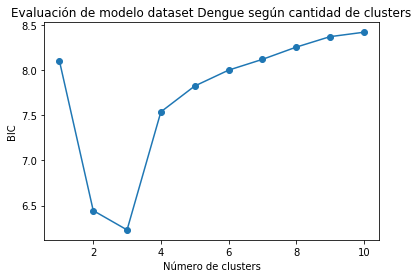

In [3]:
data=pd.read_csv('dengue.csv')
data=data.dropna()
X=data[['humid', 'temp' , 'h10pix', 'trees' , 'Xmin', 'Ymin']].values
X=preprocessing.normalize(X)

KMeans = [cluster.KMeans(n_clusters = i).fit(X) for i in range(1,11)]
scores=[KMeans[i].predict(X) for i in range(0,10)]
BIC =np.asarray( [compute_bic(kmeansi,X) for kmeansi in KMeans])


plt.plot(np.arange(1,11),np.log(abs(BIC)),marker='o',linestyle='-')
plt.title('Evaluación de modelo dataset Dengue según cantidad de clusters')
plt.xlabel("Número de clusters")
plt.ylabel("BIC")
plt.show()

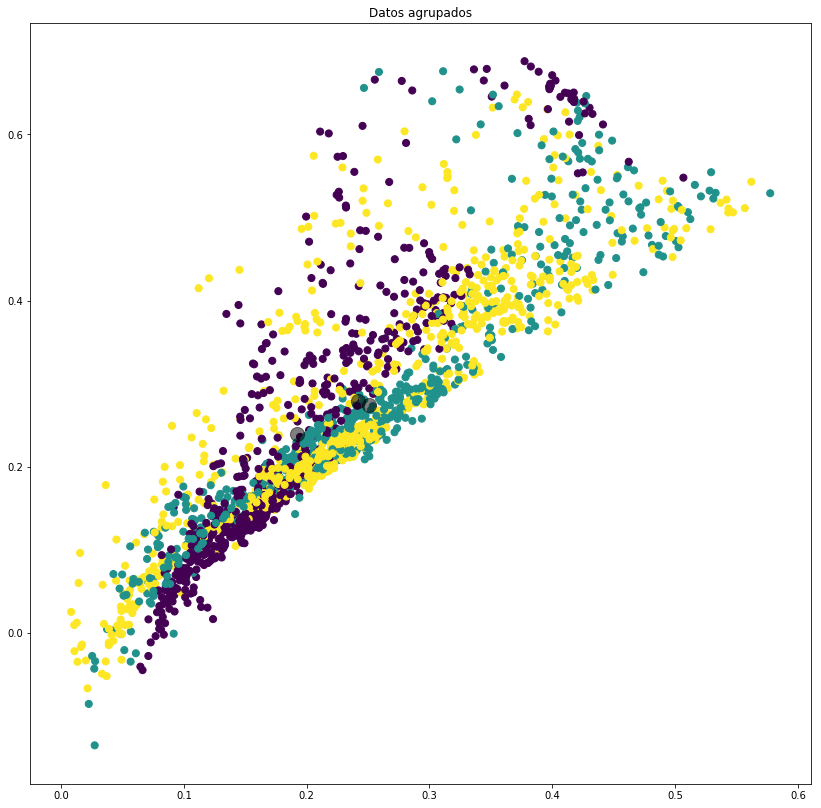

In [4]:
kmeans = cluster.KMeans(n_clusters=3)
kmeans.fit(X)
y_kmeans = kmeans.predict(X)
plt.figure(figsize=(14,14))
plt.scatter(X[:, 0], X[:, 1], c=y_kmeans, s=50, cmap='viridis')
centers = kmeans.cluster_centers_
plt.title('Datos agrupados')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

In [5]:
from datetime import datetime

le = preprocessing.LabelEncoder()
data=pd.read_csv('BreadBasket_DMS.csv')

X_=data[['Date', 'Time','Item']].values
le.fit(X_[:,2])
items=le.transform(X_[:,2])

dates=[]
for i in range(len(X_)):
    dates.append(X_[i,0].split('-'))

hours=[]
for i in range(len(X_)):
    hours.append((datetime.strptime(X_[i,1],'%H:%M:%S').timestamp()))

dates=np.array(dates,dtype=float)

X=np.concatenate([dates,np.array(hours).reshape(-1,1)],axis=1)
X=np.concatenate([X,items.reshape(-1,1)],axis=1)

X[:,3]=preprocessing.scale(X[:,3])


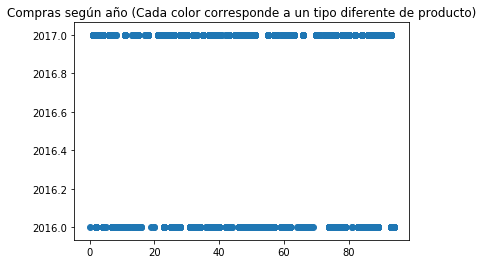

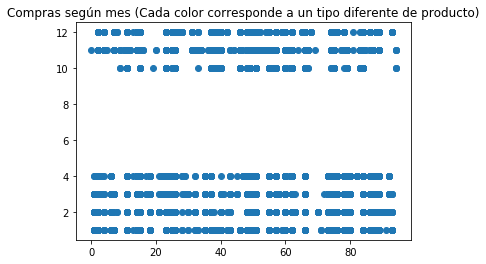

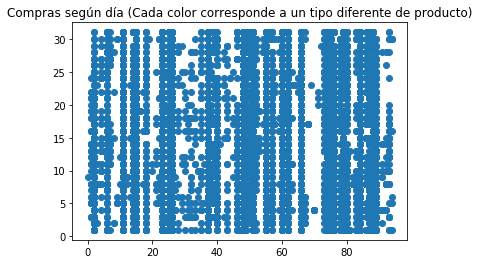

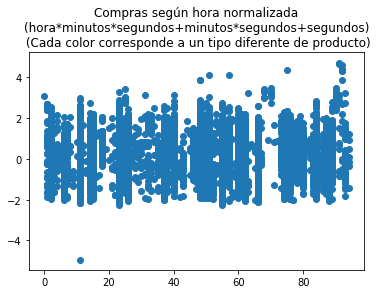

In [6]:

plt.scatter(X[:,4],X[:,0])
plt.title('Compras según año (Cada color corresponde a un tipo diferente de producto)')   
plt.show()

plt.scatter(X[:,4],X[:,1])
plt.title('Compras según mes (Cada color corresponde a un tipo diferente de producto)')   
plt.show()

plt.scatter(X[:,4],X[:,2])
plt.title('Compras según día (Cada color corresponde a un tipo diferente de producto)')   
plt.show()
plt.scatter(X[:,4],X[:,3])
plt.title('Compras según hora normalizada\n(hora*minutos*segundos+minutos*segundos+segundos)\n (Cada color corresponde a un tipo diferente de producto)')   
plt.show()


(21293, 5)
(21293, 5)


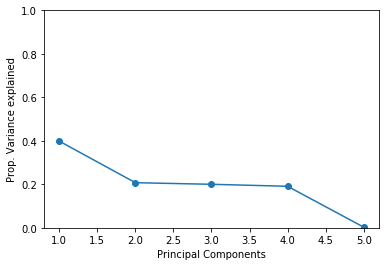

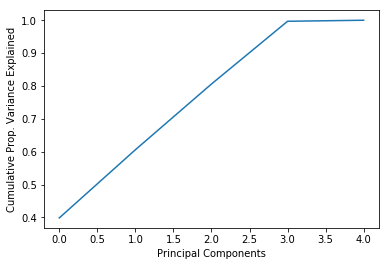

In [7]:
Xpca=X.copy()
Xpca=preprocessing.scale(Xpca)
print(Xpca.shape)
pca = PCA()
pca.fit(Xpca)
Xpca=pca.transform(Xpca)
print(X.shape)

ve=pca.explained_variance_ratio_
ve=ve/sum(ve)
PC=np.arange(1.0,len(ve)+1,1.0)
plt.plot(PC,ve,marker='o',linestyle='-')
plt.xlabel('Principal Components')
plt.ylim([0,1.0])
plt.ylabel('Prop. Variance explained')
plt.show()
cumulative=np.zeros(len(ve))
for i in range(len(cumulative)):
    cumulative[i]=sum(ve[:i+1])

    
plt.plot(cumulative)
plt.xlabel('Principal Components')
plt.ylabel('Cumulative Prop. Variance Explained')
plt.show()



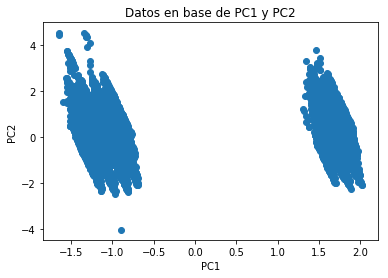

In [8]:
Xfin=X.copy()
Xfin=preprocessing.scale(Xfin)

pca = PCA(n_components=2)
pca.fit(Xfin)
Xfin=pca.transform(Xfin)

plt.scatter(Xfin[:,0],Xfin[:,1])
plt.title('Datos en base de PC1 y PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



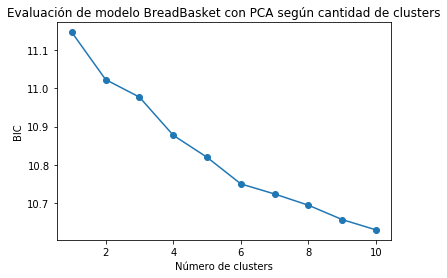

In [9]:
KMeans = [cluster.KMeans(n_clusters = i).fit(Xfin) for i in range(1,11)]
scores=[KMeans[i].predict(Xfin) for i in range(0,10)]
BIC =np.asarray( [compute_bic(kmeansi,Xfin) for kmeansi in KMeans])


plt.plot(np.arange(1,11),np.log(abs(BIC)),marker='o',linestyle='-')
plt.title('Evaluación de modelo BreadBasket con PCA según cantidad de clusters')
plt.xlabel("Número de clusters")
plt.ylabel("BIC")
plt.show()

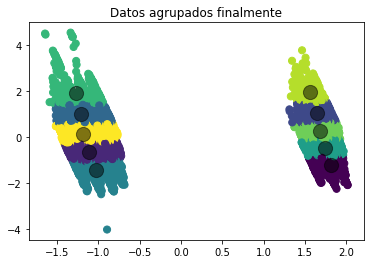

In [10]:
###
##Se puede elegir la cantidad de clusters que se desee, en este caso, elegí 10, pero es posible cambiar el número de clusters para ver cómo se agrupan
###


kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(Xfin)
y_kmeans = kmeans.predict(Xfin)
plt.scatter(Xfin[:, 0], Xfin[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.title('Datos agrupados finalmente')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

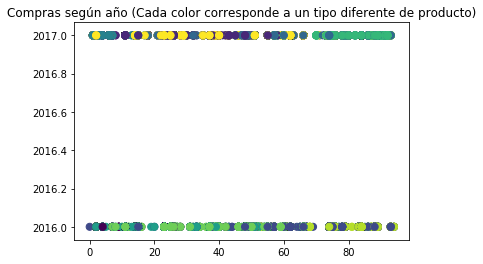

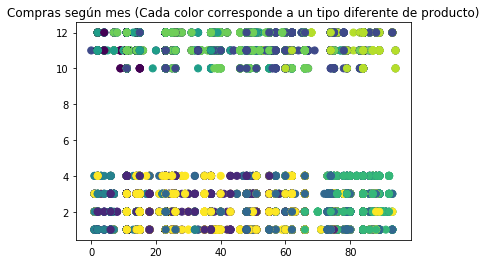

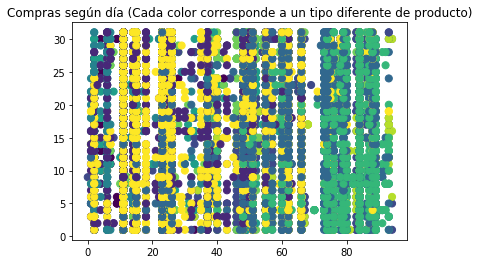

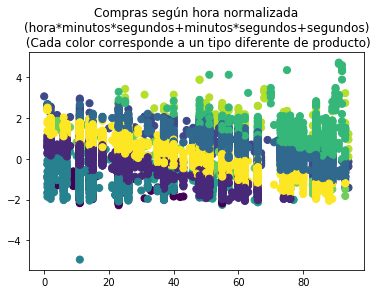

In [11]:
Xback=pca.inverse_transform(Xfin)
plt.scatter(X[:,4],X[:,0],c=y_kmeans, s=50, cmap='viridis')
plt.title('Compras según año (Cada color corresponde a un tipo diferente de producto)')   
plt.show()

plt.scatter(X[:,4],X[:,1],c=y_kmeans, s=50, cmap='viridis')
plt.title('Compras según mes (Cada color corresponde a un tipo diferente de producto)')   
plt.show()

plt.scatter(X[:,4],X[:,2],c=y_kmeans, s=50, cmap='viridis')
plt.title('Compras según día (Cada color corresponde a un tipo diferente de producto)')   
plt.show()
plt.scatter(X[:,4],X[:,3],c=y_kmeans, s=50, cmap='viridis')
plt.title('Compras según hora normalizada\n(hora*minutos*segundos+minutos*segundos+segundos)\n (Cada color corresponde a un tipo diferente de producto)')   
plt.show()


In [12]:
print("Como se puede ver, los clusters finales agrupan productos según la hora del día, \n lo cual tiene sentido ya que puede representar diferentes tipos de meriendas: desayuno, \n almuerzo, cena, etc.")

print("----------------------------------------------------------------------------------------")
print("------------------------Ahora, descartaré usar años, y sólo usaré meses, días y hora----")
print("----------------------------------------------------------------------------------------")

Como se puede ver, los clusters finales agrupan productos según la hora del día, 
 lo cual tiene sentido ya que puede representar diferentes tipos de meriendas: desayuno, 
 almuerzo, cena, etc.
----------------------------------------------------------------------------------------
------------------------Ahora, descartaré usar años, y sólo usaré meses, días y hora----
----------------------------------------------------------------------------------------


In [13]:
from datetime import datetime

le = preprocessing.LabelEncoder()
data=pd.read_csv('BreadBasket_DMS.csv')

X_=data[['Date', 'Time','Item']].values
le.fit(X_[:,2])
items=le.transform(X_[:,2])

dates=[]
for i in range(len(X_)):
    dates.append(X_[i,0].split('-')[1:])

hours=[]
for i in range(len(X_)):
    hours.append((datetime.strptime(X_[i,1],'%H:%M:%S').timestamp()))

dates=np.array(dates,dtype=float)

X=np.concatenate([dates,np.array(hours).reshape(-1,1)],axis=1)
X=np.concatenate([X,items.reshape(-1,1)],axis=1)

X[:,2]=preprocessing.scale(X[:,2])


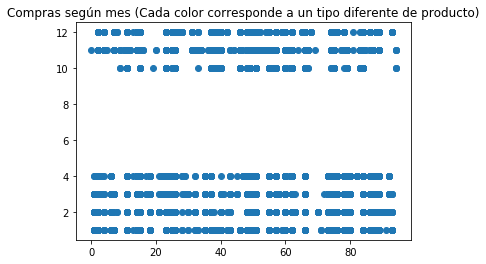

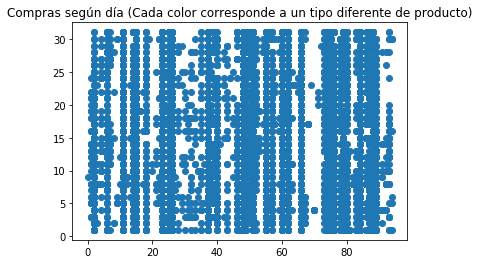

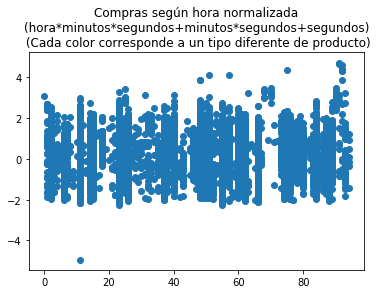

In [14]:

plt.scatter(X[:,3],X[:,0])
plt.title('Compras según mes (Cada color corresponde a un tipo diferente de producto)')   
plt.show()

plt.scatter(X[:,3],X[:,1])
plt.title('Compras según día (Cada color corresponde a un tipo diferente de producto)')   
plt.show()
plt.scatter(X[:,3],X[:,2])
plt.title('Compras según hora normalizada\n(hora*minutos*segundos+minutos*segundos+segundos)\n (Cada color corresponde a un tipo diferente de producto)')   
plt.show()


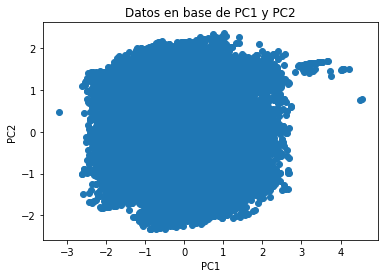

In [15]:
Xfin=X.copy()
Xfin=preprocessing.scale(Xfin)

pca = PCA(n_components=2)
pca.fit(Xfin)
Xfin=pca.transform(Xfin)

plt.scatter(Xfin[:,0],Xfin[:,1])
plt.title('Datos en base de PC1 y PC2')
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.show()



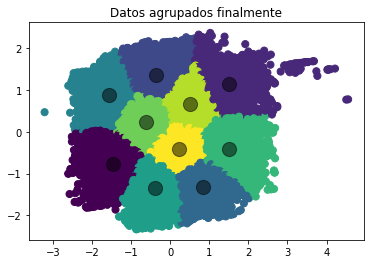

In [16]:
kmeans = cluster.KMeans(n_clusters=10)
kmeans.fit(Xfin)
y_kmeans = kmeans.predict(Xfin)
plt.scatter(Xfin[:, 0], Xfin[:, 1], c=y_kmeans, s=50, cmap='viridis')

centers = kmeans.cluster_centers_
plt.title('Datos agrupados finalmente')
plt.scatter(centers[:, 0], centers[:, 1], c='black', s=200, alpha=0.5);

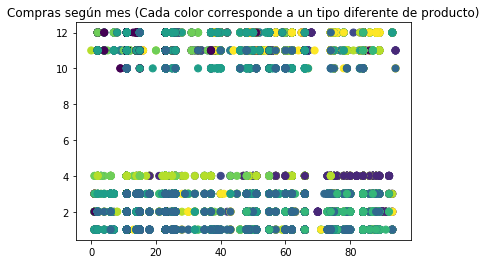

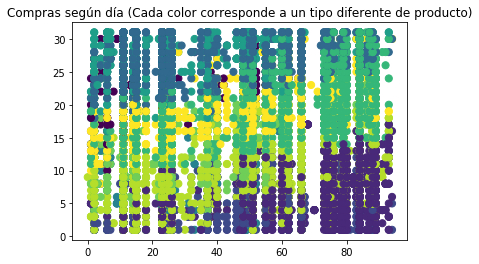

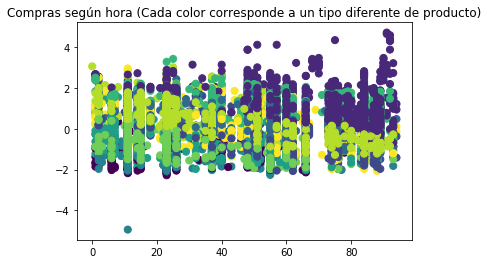

In [17]:
Xback=pca.inverse_transform(Xfin)
plt.scatter(X[:,3],X[:,0],c=y_kmeans, s=50, cmap='viridis')
plt.title('Compras según mes (Cada color corresponde a un tipo diferente de producto)')   
plt.show()

plt.scatter(X[:,3],X[:,1],c=y_kmeans, s=50, cmap='viridis')
plt.title('Compras según día (Cada color corresponde a un tipo diferente de producto)')   
plt.show()

plt.scatter(X[:,3],X[:,2],c=y_kmeans, s=50, cmap='viridis')
plt.title('Compras según hora (Cada color corresponde a un tipo diferente de producto)')   
plt.show()
